In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import a 311 NYC service request.

In [3]:
nyc=pd.read_csv('/home/labsuser/data/311_Service_Requests_from_2010_to_Present.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
nyc.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [5]:
nyc.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [6]:
#Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype 

In [7]:
nyc['Created Date']=pd.to_datetime(nyc['Created Date'])

In [8]:
nyc['Closed Date']=pd.to_datetime(nyc['Closed Date'])

In [9]:
#create new column ‘Request_Closing_Time’ as the time elapsed between request creation & request closing

In [10]:
nyc['Request_Closing_Time']=nyc['Closed Date']-nyc['Created Date']

In [50]:
nyc.dtypes

Unique Key                                  int64
Created Date                       datetime64[ns]
Closed Date                        datetime64[ns]
Agency                                     object
Agency Name                                object
Complaint Type                             object
Descriptor                                 object
Location Type                              object
Incident Zip                              float64
Incident Address                           object
Street Name                                object
Cross Street 1                             object
Cross Street 2                             object
Intersection Street 1                      object
Intersection Street 2                      object
Address Type                               object
City                                       object
Landmark                                   object
Facility Type                              object
Status                                     object


In [12]:
# Maximum no. of complaint types

In [13]:
complaint=nyc['Complaint Type'].value_counts()


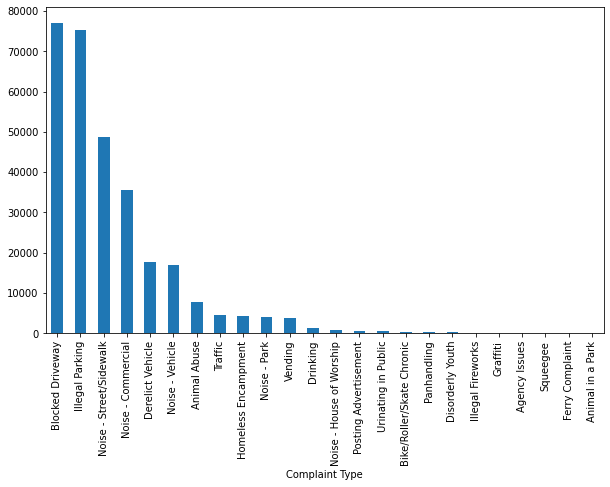

In [14]:
nyc['Complaint Type'].value_counts().plot(kind='bar',figsize=(10,6))
plt.xlabel('Complaint Type')
plt.show()

In [15]:
# total location count

In [16]:
location=nyc['Location Type'].value_counts()[:5]

<AxesSubplot:ylabel='Location Type'>

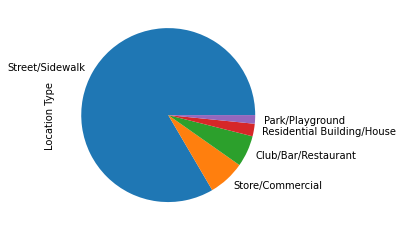

In [17]:
location.plot(kind='pie')

In [18]:
# city with complaint counts

In [19]:
city=nyc['City'].value_counts()

In [20]:
city.head()

BROOKLYN         98307
NEW YORK         65994
BRONX            40702
STATEN ISLAND    12343
JAMAICA           7296
Name: City, dtype: int64

In [21]:
# Table on City and Complaint type based on maximum response time

In [22]:
nyc['Response_days']=nyc['Request_Closing_Time']/np.timedelta64(1,'D')

In [23]:
table = pd.pivot_table(nyc, index ='City',columns='Complaint Type',values='Response_days',fill_value='not reported',aggfunc=np.max)
table

Complaint Type,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,0.269572,not reported,not reported,0.305556,0.279097,0.151123,0.00994213,0.0638889,0.106181,not reported,...,0.125359,0.075,0.224236,0.210799,0.0430556,not reported,not reported,not reported,0.028831,0.0201389
ASTORIA,0.827303,not reported,0.259028,1.37416,2.58365,0.315949,0.509028,1.05529,0.63441,0.384722,...,0.23956,0.559433,0.508333,0.719352,0.0479167,0.244583,not reported,0.664375,0.46875,0.556354
Astoria,not reported,not reported,not reported,1.21865,1.09792,not reported,not reported,not reported,not reported,not reported,...,not reported,not reported,0.985671,not reported,not reported,not reported,not reported,not reported,not reported,not reported
BAYSIDE,0.438194,not reported,not reported,0.492269,0.623553,0.123877,0.0791667,0.202025,0.122222,not reported,...,0.236806,0.295833,0.158495,0.271528,not reported,not reported,not reported,0.22206,not reported,0.122338
BELLEROSE,1.41753,not reported,0.204167,4.0311,3.40764,0.09375,0.163252,not reported,1.63056,0.277778,...,0.0915394,0.0589236,1.41109,0.294039,0.311806,0.0941667,not reported,0.622824,0.314225,not reported
BREEZY POINT,0.174525,not reported,not reported,0.0921644,0.475428,not reported,0.109722,not reported,not reported,not reported,...,not reported,not reported,0.0416667,0.0551852,not reported,not reported,not reported,not reported,not reported,not reported
BRONX,5.25066,not reported,0.414583,6.17847,5.05693,0.819201,3.94861,0.933333,1.85625,0.635417,...,0.866042,2.40347,6.1125,6.14375,6.04514,0.540972,not reported,1.86806,0.75,3.20519
BROOKLYN,21.6361,not reported,1.4131,2.66111,9.30708,1.16906,2.55323,2.2755,1.6713,1.16053,...,1.78542,1.09035,24.703,1.66541,2.32917,0.648611,not reported,1.46875,1.71042,1.56103
CAMBRIA HEIGHTS,2.02182,not reported,not reported,1.88679,5.92572,not reported,not reported,not reported,1.81771,0.0637731,...,0.145081,not reported,0.682986,1.60909,not reported,not reported,not reported,1.24198,not reported,not reported


In [24]:
#Order the complaint types based on the average ‘Request_Closing_Time’
#grouping them for different locations.

In [25]:
nyc['Response_hours']=nyc['Request_Closing_Time']/np.timedelta64(1,'h')

In [26]:
nyc.groupby('Complaint Type')['Response_hours'].mean()

Complaint Type
Agency Issues                  5.260324
Animal Abuse                   5.213244
Animal in a Park             336.834722
Bike/Roller/Skate Chronic      3.766462
Blocked Driveway               4.740905
Derelict Vehicle               7.364140
Disorderly Youth               3.558584
Drinking                       3.861833
Ferry Complaint                     NaN
Graffiti                       7.151251
Homeless Encampment            4.365570
Illegal Fireworks              2.761139
Illegal Parking                4.501152
Noise - Commercial             3.147154
Noise - House of Worship       3.193298
Noise - Park                   3.410732
Noise - Street/Sidewalk        3.445224
Noise - Vehicle                3.588993
Panhandling                    4.372768
Posting Advertisement          1.975803
Squeegee                       4.045625
Traffic                        3.448681
Urinating in Public            3.626664
Vending                        4.013919
Name: Response_hours, dty

In [27]:
nyc.groupby(['Location Type','Complaint Type'])['Response_hours'].mean()

Location Type        Complaint Type     
Bridge               Homeless Encampment    3.819306
Club/Bar/Restaurant  Drinking               4.545812
                     Noise - Commercial     3.063921
                     Urinating in Public    7.920000
Commercial           Animal Abuse           5.342769
                                              ...   
Street/Sidewalk      Vending                4.026692
Subway Station       Animal Abuse           3.035606
                     Urinating in Public    1.152130
Terminal             Ferry Complaint             NaN
Vacant Lot           Derelict Vehicle       7.473925
Name: Response_hours, Length: 71, dtype: float64

In [28]:
pd.pivot_table(nyc,index=['City','Location Type'],columns='Complaint Type',values='Response_hours',aggfunc='mean')

Complaint Type                       Animal Abuse  Animal in a Park  \
City     Location Type                                                
ARVERNE  Club/Bar/Restaurant                  NaN               NaN   
         House of Worship                     NaN               NaN   
         Park/Playground                      NaN               NaN   
         Residential Building/House      2.081484               NaN   
         Store/Commercial                     NaN               NaN   
...                                           ...               ...   
WOODSIDE Parking Lot                     5.766667               NaN   
         Vacant Lot                           NaN               NaN   
         Commercial                      5.621250               NaN   
Woodside Store/Commercial                     NaN               NaN   
         Street/Sidewalk                      NaN               NaN   

Complaint Type                       Bike/Roller/Skate Chronic  \
City     Location Type                                           
ARVERNE  Club/Bar/Restaurant                               NaN   
         House of Worship                                  NaN   
         Park/Playground                                   NaN   
         Residential Building/House                        NaN   
         Store/Commercial                                  NaN   
...                                                        ...   
WOODSIDE Parking Lot                                       NaN   
         Vacant Lot                                        NaN   
         Commercial                                        NaN   
Woodside Store/Commercial                                  NaN   
         Street/Sidewalk                                   NaN   

Complaint Type                       Blocked Driveway  Derelict Vehicle  \
City     Location Type                                                    
ARVERNE  Club/Bar/Restaurant                      NaN               NaN   
         House of Worship                         NaN               NaN   
         Park/Playground                          NaN               NaN   
         Residential Building/House               NaN               NaN   
         Store/Commercial                         NaN               NaN   
...                                               ...               ...   
WOODSIDE Parking Lot                              NaN               NaN   
         Vacant Lot                               NaN          3.950000   
         Commercial                               NaN               NaN   
Woodside Store/Commercial                         NaN               NaN   
         Street/Sidewalk                     6.406212          4.966667   

Complaint Type                       Disorderly Youth  Drinking  Graffiti  \
City     Location Type                                                      
ARVERNE  Club/Bar/Restaurant                      NaN  0.238611       NaN   
         House of Worship                         NaN       NaN       NaN   
         Park/Playground                          NaN       NaN       NaN   
         Residential Building/House               NaN       NaN       NaN   
         Store/Commercial                         NaN       NaN  1.533333   
...                                               ...       ...       ...   
WOODSIDE Parking Lot                              NaN       NaN       NaN   
         Vacant Lot                               NaN       NaN       NaN   
         Commercial                               NaN       NaN       NaN   
Woodside Store/Commercial                         NaN       NaN       NaN   
         Street/Sidewalk                          NaN       NaN       NaN   

Complaint Type                       Homeless Encampment  Illegal Fireworks  \
City     Location Type                                                        
ARVERNE  Club/Bar/Restaurant                         NaN                NaN   
  

In [29]:
# Perform a statistical test:
# Whether the average response time across complaint types is similar or not (overall)

In [30]:
# H0: the average response time in days is same for different complaint types
# Ha: the average response time in days is different for different complaint types

In [31]:
top_10_complaints=nyc['Complaint Type'].value_counts()[:10]

In [32]:
top_10_complaints

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Noise - Vehicle            17083
Animal Abuse                7778
Traffic                     4498
Homeless Encampment         4416
Noise - Park                4042
Name: Complaint Type, dtype: int64

In [33]:
df1=nyc[nyc['Complaint Type']=='Blocked Driveway']
df2=nyc[nyc['Complaint Type']=='Illegal Parking']
df3=nyc[nyc['Complaint Type']=='Noise - Street/Sidewalk']
df4=nyc[nyc['Complaint Type']=='Noise - Commercial']
df5=nyc[nyc['Complaint Type']=='Derelict Vehicle']
df6=nyc[nyc['Complaint Type']=='Noise - Vehicle']
df7=nyc[nyc['Complaint Type']=='Animal Abuse']
df8=nyc[nyc['Complaint Type']=='Traffic']
df9=nyc[nyc['Complaint Type']=='Homeless Encampment']
df10=nyc[nyc['Complaint Type']=='Noise - Park']

In [34]:
ar1=df1['Response_days'].dropna()
ar2=df2['Response_days'].dropna()
ar3=df3['Response_days'].dropna()
ar4=df4['Response_days'].dropna()
ar5=df5['Response_days'].dropna()
ar6=df6['Response_days'].dropna()
ar7=df7['Response_days'].dropna()
ar8=df8['Response_days'].dropna()
ar9=df9['Response_days'].dropna()
ar10=df10['Response_days'].dropna()


In [35]:
# run the anova model

import scipy.stats as stats

In [36]:
stats.f_oneway(ar1,ar2,ar3,ar4,ar5,ar6,ar7,ar8,ar9,ar10)


F_onewayResult(statistic=882.0559836039338, pvalue=0.0)

In [37]:
# as p value ~ 0 , we reject null hypothesis H0

# Thus the average response time in days is not similar for different complaint types

In [38]:
# Perform a statistical test:
#Are the type of complaint or service requested and location related

In [39]:
# CIty and complaint 

# Chi square - categorical values to check whether two variables are independent

# H0: the city and the complaint type is independent of each other

# Ha: the city and the complaint type is not independent of each other

In [40]:
nyc['City'].value_counts()

BROOKLYN               98307
NEW YORK               65994
BRONX                  40702
STATEN ISLAND          12343
JAMAICA                 7296
ASTORIA                 6330
FLUSHING                5971
RIDGEWOOD               5163
CORONA                  4295
WOODSIDE                3544
SOUTH RICHMOND HILL     2774
OZONE PARK              2755
EAST ELMHURST           2734
ELMHURST                2673
WOODHAVEN               2464
MASPETH                 2462
LONG ISLAND CITY        2437
SOUTH OZONE PARK        2173
RICHMOND HILL           1904
FRESH MEADOWS           1899
QUEENS VILLAGE          1814
MIDDLE VILLAGE          1765
JACKSON HEIGHTS         1689
FOREST HILLS            1688
REGO PARK               1486
BAYSIDE                 1221
COLLEGE POINT           1220
FAR ROCKAWAY            1179
WHITESTONE              1098
HOLLIS                  1012
HOWARD BEACH             931
ROSEDALE                 922
SPRINGFIELD GARDENS      883
SAINT ALBANS             834
KEW GARDENS   

In [41]:
top_10_complaints.index

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle', 'Noise - Vehicle',
       'Animal Abuse', 'Traffic', 'Homeless Encampment', 'Noise - Park'],
      dtype='object')

In [42]:
top10_nyc=nyc[nyc['Complaint Type'].isin(top_10_complaints.index)]

In [43]:
top10_nyc

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Response_days,Response_hours
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15,0.038368,0.920833
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16,0.059907,1.437778
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31,0.202442,4.858611
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14,0.323079,7.753889
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02,0.143773,3.450556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,2015-03-29 00:33:41,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)",0 days 02:00:31,0.083692,2.008611
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)",0 days 03:07:17,0.130058,3.121389
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)",0 days 04:05:33,0.170521,4.092500


In [44]:
# get a crosstab of the City and the Complaint Types
city_comp_table=pd.crosstab(top10_nyc['City'],top10_nyc['Complaint Type'])

In [45]:
city_comp_table


Complaint Type,Animal Abuse,Blocked Driveway,Derelict Vehicle,Homeless Encampment,Illegal Parking,Noise - Commercial,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Traffic
City,,,,,,,,,,
ARVERNE,38,35,27,4,58,2,2,29,7,0
ASTORIA,125,2618,351,32,1068,1293,61,386,204,47
Astoria,0,116,12,0,213,262,0,114,0,0
BAYSIDE,37,377,198,2,514,40,4,15,16,9
BELLEROSE,7,95,89,1,106,37,1,13,10,7
BREEZY POINT,2,3,3,0,15,4,0,1,1,0
BRONX,1415,12755,1953,247,7859,2434,547,8892,3396,355
BROOKLYN,2394,28148,5181,857,27462,11463,1555,13356,5177,1085
CAMBRIA HEIGHTS,11,147,115,5,76,12,0,25,77,6


In [46]:
chi2_stats,pvalue,df,mean_val=stats.chi2_contingency(city_comp_table)

In [47]:
pvalue

0.0

In [48]:
chi2_stats

84958.14961578615

In [49]:
# as p value =0 < alpha ,we will reject the null hypothesis H0.

# the city and the complaint type is not independent of each other